# Employee Promotion

## Background & Context



Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most.
The ultimate reward for dedication and loyalty towards an organization and HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also
if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.

So this time HR team wants to utilize the stored data to make a model, that will predict if a person is eligible for promotion or not.

You as a data scientist at JMD company, need to come up with a model that will help the HR team to predict if a person is eligible for promotion or not.


## Objective
- Explore and visualize the dataset.
- Build a classification model to predict if the employee has a higher probability of getting a promotion
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the company

The data is stored in 'employee_promotion.csv'.

### Data Description

- employee_id	
- department	
- region	
- education	
- gender	
- recruitment_channel	
- no_of_trainings	
- age	
- previous_year_rating	
- length_of_service	
- awards_won	
- avg_training_score	
- is_promoted


### Importing Libraries

In [39]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    RandomForestClassifier
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them

from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

from IPython.display import Image
# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

<IPython.core.display.Javascript object>

### Loading Data

In [2]:
# Loading Data File
promo = pd.read_csv("employee_promotion.csv")

<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the data
promo.shape

(54808, 13)

<IPython.core.display.Javascript object>

In [4]:
# Creating copy so that refreshing df is quicker, if needed
data= promo.copy()

<IPython.core.display.Javascript object>

## Overview of data

In [5]:
# let's view the first 5 rows of the data
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0


<IPython.core.display.Javascript object>

In [6]:
# let's view the last 5 rows of the data
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000,2,0,nan,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.000,5,0,49.000,0


<IPython.core.display.Javascript object>

In [7]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


<IPython.core.display.Javascript object>

- Each row represents an unique Employee record.
- There are a total of 13 columns and 54,808 observations in the dataset
- We can see that education, previous_year_rating and avg_training_score columns have less than 54808 non-null values i.e. columns have missing values. We'll explore this further.

In [8]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicates

In [9]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000,39195.831,22586.581,1.000,19669.750,39225.500,58730.500,78298.000
no_of_trainings,54808.000,1.253,0.609,1.000,1.000,1.000,1.000,10.000
age,54808.000,34.804,7.660,20.000,29.000,33.000,39.000,60.000
previous_year_rating,50684.000,3.329,1.260,1.000,3.000,3.000,4.000,5.000
length_of_service,54808.000,5.866,4.265,1.000,3.000,5.000,7.000,37.000
awards_won,54808.000,0.023,0.150,0.000,0.000,0.000,0.000,1.000
avg_training_score,52248.000,63.712,13.522,39.000,51.000,60.000,77.000,99.000
is_promoted,54808.000,0.085,0.279,0.000,0.000,0.000,0.000,1.000


<IPython.core.display.Javascript object>

**Observations:**
- `avg_training_score` has a max value of 99 which is the largest number in the data-set. 
- employee_id can be ignored as it does not play any role in prediction models.
- Columns - `awards_won', aqnd 'is_promoted might be a boolean column with 1's or 0's.


In [10]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0


<IPython.core.display.Javascript object>

In [11]:
# Dropping column - employee_id as it adds no value for this study.
data.drop(columns=["employee_id"], inplace=True)

<IPython.core.display.Javascript object>

**Let's check the count of each unique category in each of the categorical variables.** 

In [12]:
# Making a list of all categorical variables
cat_col = [
    "department",
    "region",
    "education",
    "recruitment_channel",
    "age",
    "gender"
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
----------------------------------------
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64
------------

<IPython.core.display.Javascript object>

#### Preparing data for EDA

In [13]:
# Encoding data for the prpose of EDA. During pre-processing encoding will be done as part of standards

data_encoded=pd.get_dummies(data=data,drop_first=True)
data_encoded

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.000,8,0,49.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,1,30,5.000,4,0,60.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,34,3.000,7,0,50.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,2,39,1.000,10,0,50.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,45,3.000,2,0,73.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,48,3.000,17,0,78.000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
54804,1,37,2.000,6,0,56.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
54805,1,27,5.000,3,0,79.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
54806,1,29,1.000,2,0,nan,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


<IPython.core.display.Javascript object>

In [14]:
# fixing column names in data_encoded
data_encoded.columns = [c.replace("&", "") for c in data_encoded.columns]

data_encoded.columns = [c.replace("education_Below Secondary", "education_below_Secondary") for c in data_encoded.columns]
data_encoded.columns = [c.replace("department_Sales  Marketing", "department_Sales_and_Marketing") for c in data_encoded.columns]
data_encoded.columns = [c.replace("education_Master's  above", "education_Masters_and_Above") for c in data_encoded.columns]
data_encoded.columns = [c.replace("department_RD ", "department_R_and_D") for c in data_encoded.columns]
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   no_of_trainings                 54808 non-null  int64  
 1   age                             54808 non-null  int64  
 2   previous_year_rating            50684 non-null  float64
 3   length_of_service               54808 non-null  int64  
 4   awards_won                      54808 non-null  int64  
 5   avg_training_score              52248 non-null  float64
 6   is_promoted                     54808 non-null  int64  
 7   department_Finance              54808 non-null  uint8  
 8   department_HR                   54808 non-null  uint8  
 9   department_Legal                54808 non-null  uint8  
 10  department_Operations           54808 non-null  uint8  
 11  department_Procurement          54808 non-null  uint8  
 12  department_RD                   

<IPython.core.display.Javascript object>

In [15]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   no_of_trainings                 54808 non-null  int64  
 1   age                             54808 non-null  int64  
 2   previous_year_rating            50684 non-null  float64
 3   length_of_service               54808 non-null  int64  
 4   awards_won                      54808 non-null  int64  
 5   avg_training_score              52248 non-null  float64
 6   is_promoted                     54808 non-null  int64  
 7   department_Finance              54808 non-null  uint8  
 8   department_HR                   54808 non-null  uint8  
 9   department_Legal                54808 non-null  uint8  
 10  department_Operations           54808 non-null  uint8  
 11  department_Procurement          54808 non-null  uint8  
 12  department_RD                   

<IPython.core.display.Javascript object>

## EDA

### Univariate

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

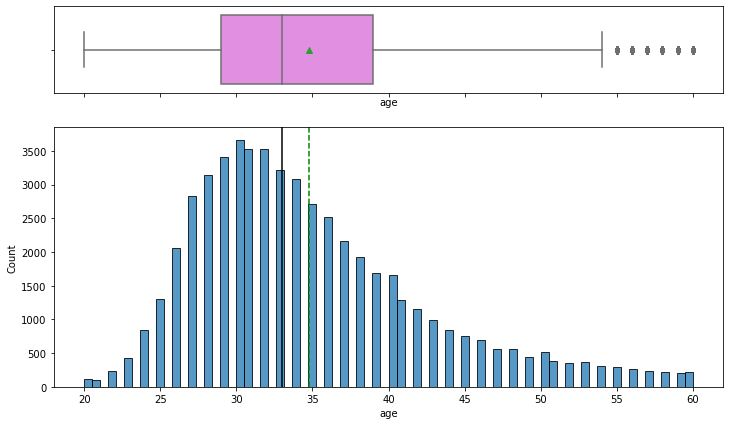

<IPython.core.display.Javascript object>

In [17]:
# Observations on age
histogram_boxplot(data_encoded, "age")

- As per the boxplot, there are no outliers in the 'Age' variable
- Age has a fairly normal distribution with approx equal mean and median

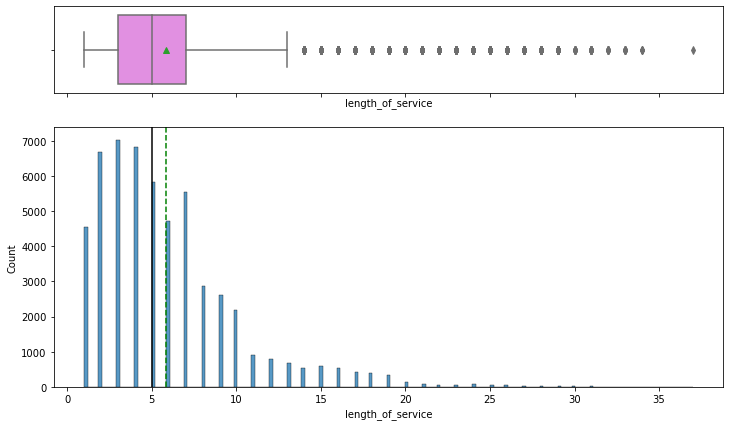

<IPython.core.display.Javascript object>

In [71]:
# observations on length_of_service
histogram_boxplot(data_encoded, "length_of_service")

- We can see there are some outliers in the length_of_service variable.
- Some variation is always expected in real-world scenarios .

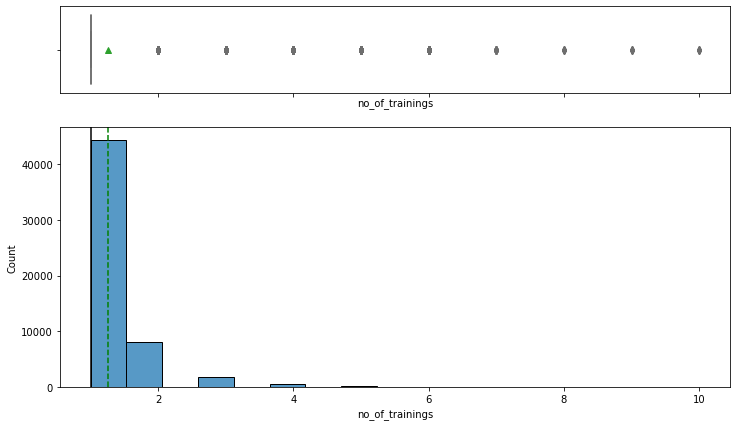

<IPython.core.display.Javascript object>

In [19]:
# observations on no_of_trainings
histogram_boxplot(data_encoded, "no_of_trainings")

- There are outliers in the 'no_of_trainings' variable
- The distribution is fairly right skewed.

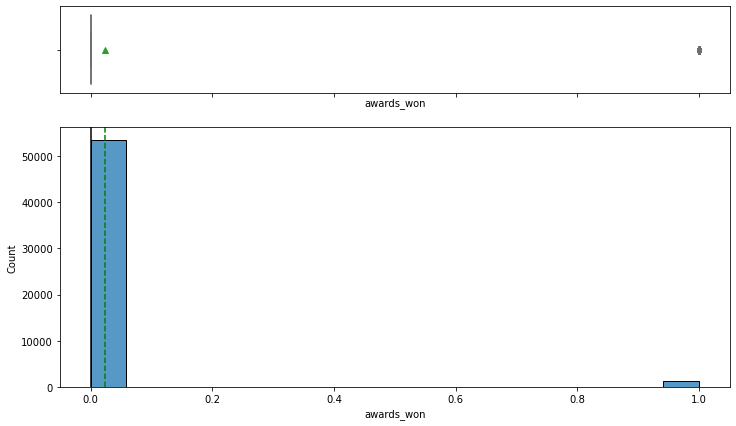

<IPython.core.display.Javascript object>

In [20]:
# observations on awards_won
histogram_boxplot(data_encoded, "awards_won")

- This indicates Binary values zero or One.

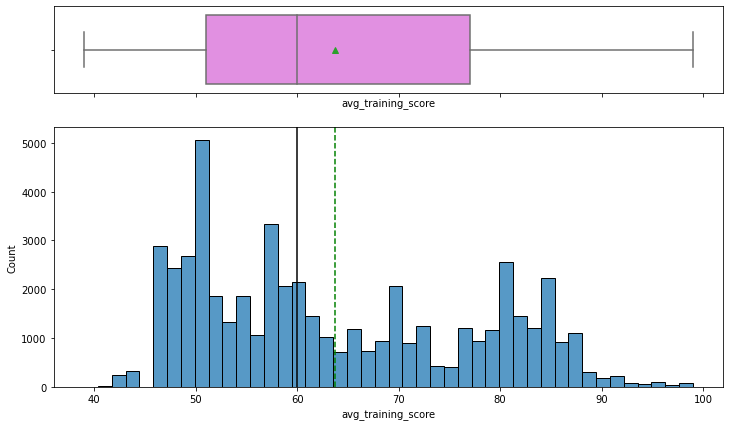

<IPython.core.display.Javascript object>

In [21]:
# observations on avg_training_score
histogram_boxplot(data_encoded, "avg_training_score")

- The distribution for the avg_training_score is slightly skewed to the right.

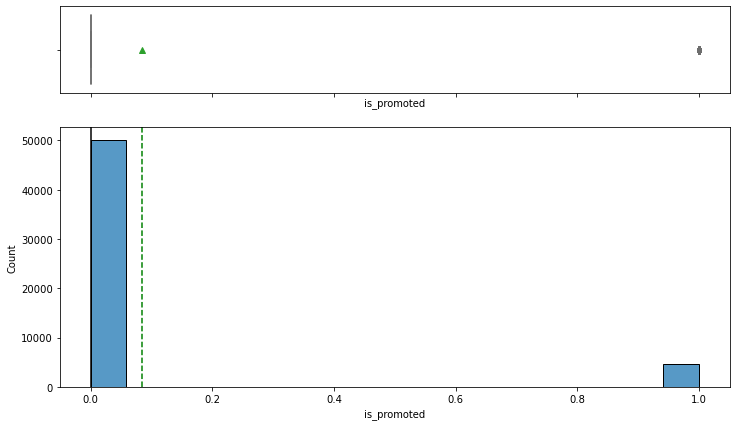

<IPython.core.display.Javascript object>

In [22]:
# observations on MntMeatProducts
histogram_boxplot(data_encoded, "is_promoted")

is_promoted has Binary values of 1 and 0.

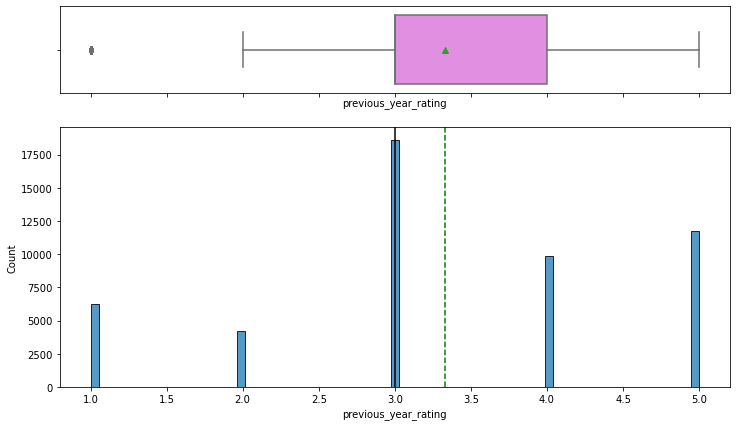

<IPython.core.display.Javascript object>

In [23]:
# observations on previous_year_rating
histogram_boxplot(data_encoded, "previous_year_rating")

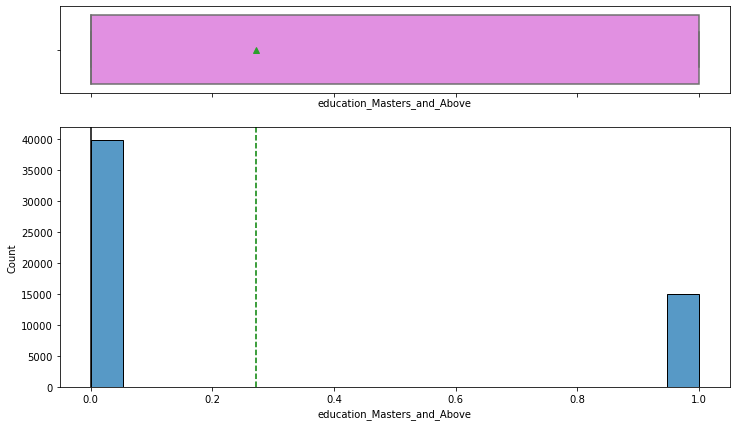

<IPython.core.display.Javascript object>

In [24]:
# observations on education_Masters_and_above                      
histogram_boxplot(data_encoded, "education_Masters_and_Above")

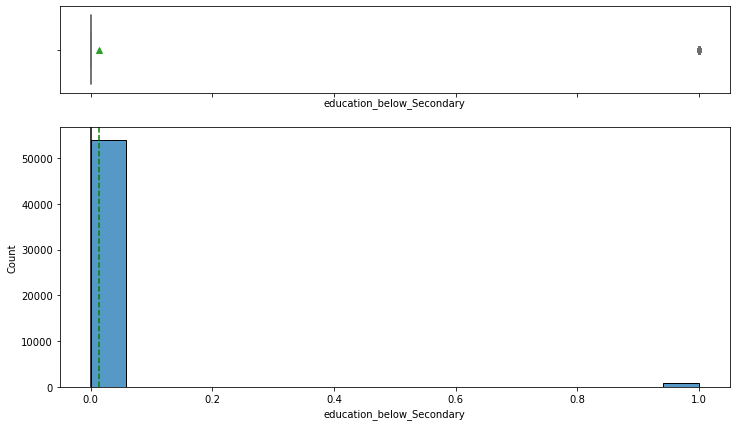

<IPython.core.display.Javascript object>

In [25]:
# observations on education_below_Secondary
histogram_boxplot(data_encoded, "education_below_Secondary")

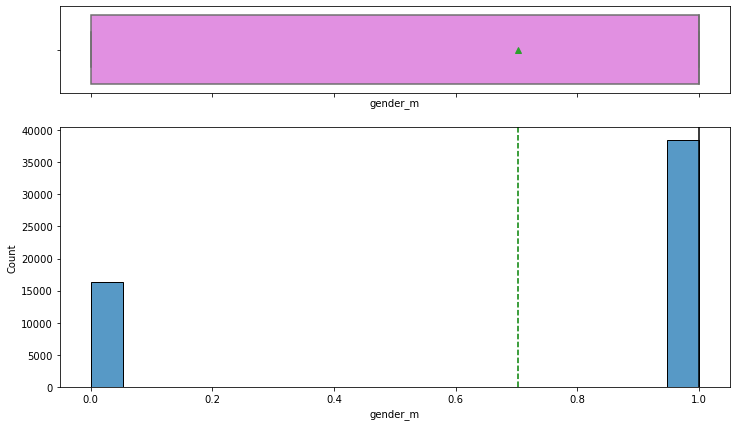

<IPython.core.display.Javascript object>

In [26]:
# observations on MntMeatProducts
histogram_boxplot(data_encoded, "gender_m")

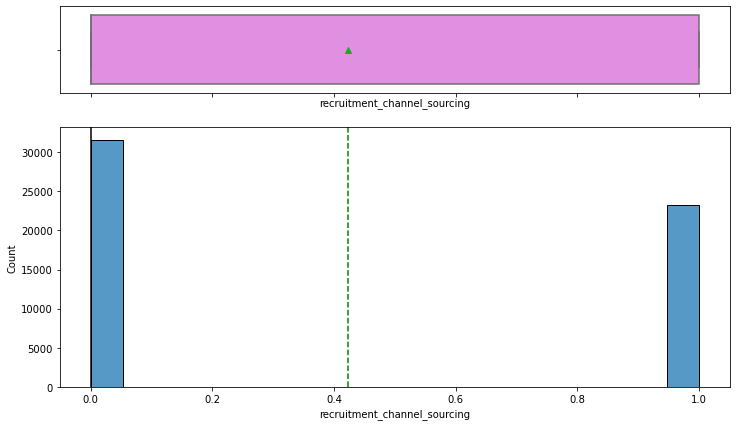

<IPython.core.display.Javascript object>

In [27]:
# observations on recruitment_channel_sourcing
histogram_boxplot(data_encoded, "recruitment_channel_sourcing")

- The distribution of channel sourcing vs others are not by far away.

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

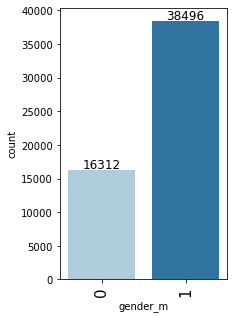

<IPython.core.display.Javascript object>

In [19]:
# observations on gender_m
labeled_barplot(data_encoded, "gender_m")

- Majority of employees are male.

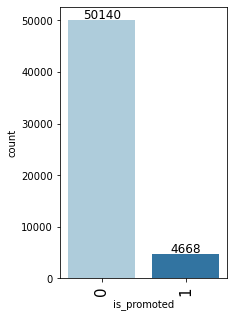

<IPython.core.display.Javascript object>

In [30]:
# observations on is_promoted
labeled_barplot(data_encoded, "is_promoted")

- Only 8% of employees received a promotion in current data-set.

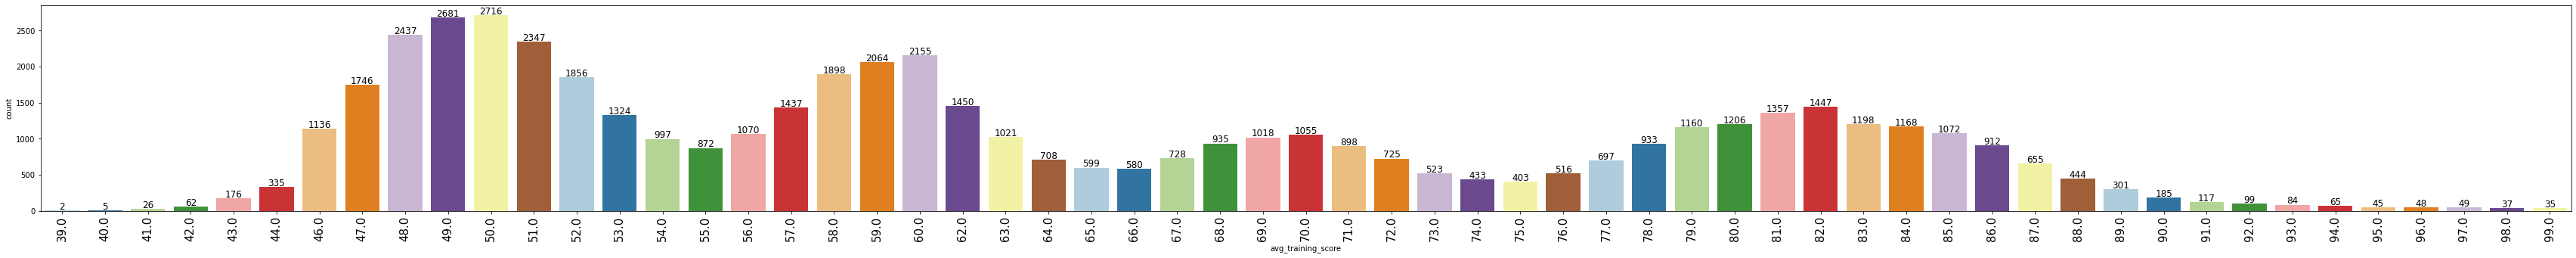

<IPython.core.display.Javascript object>

In [31]:
# observations on avg_training_score
labeled_barplot(data_encoded, "avg_training_score")

- Average training score varies by denity of population. 

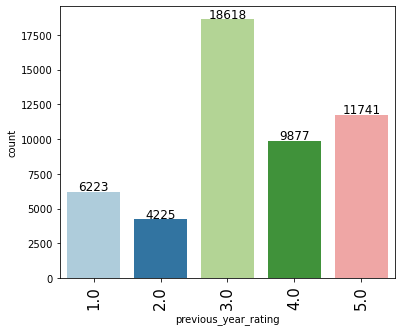

<IPython.core.display.Javascript object>

In [32]:
# observations on previous_year_rating
labeled_barplot(data_encoded, "previous_year_rating")

- Majority of the employees had 3 rating for last year.

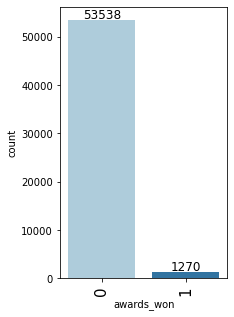

<IPython.core.display.Javascript object>

In [33]:
# observations on awards_won
labeled_barplot(data_encoded, "awards_won")

- Approx 2% of employees won awards. Majority of employees who did not win any award were promoted.

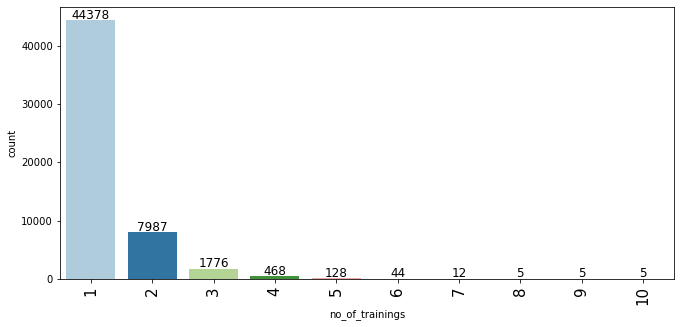

<IPython.core.display.Javascript object>

In [34]:
# observations on no_of_trainings year
labeled_barplot(data_encoded, "no_of_trainings")

- Around 90Z% employees completed at least one training and maximun is 10 in the data-set.

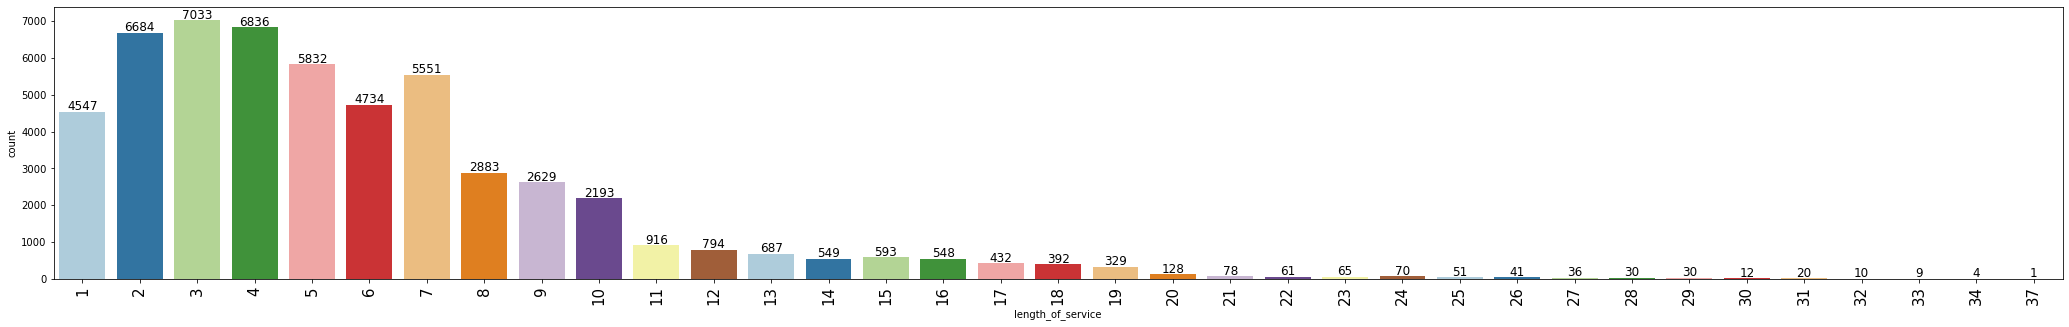

<IPython.core.display.Javascript object>

In [35]:
# observations on Registration
labeled_barplot(data_encoded, "length_of_service")

- Data is right skewed.

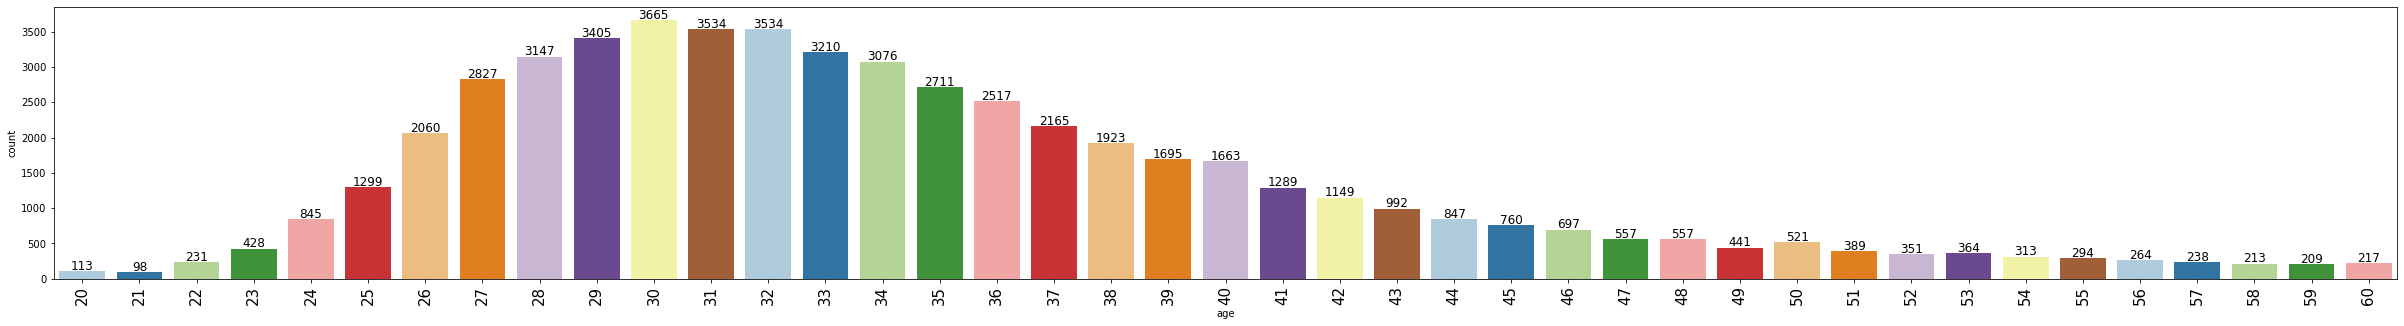

<IPython.core.display.Javascript object>

In [36]:
# observations on Registration month
labeled_barplot(data_encoded, "age")

- This shows that the highest number of registration is in the months of winters i.e. March, May, August, October.
- There is approx 3% reduction in the number of registrations from June to July.

- This shows that the number of registrations declines at the end of the month i.e. in the last two weeks.
- This can be because most people get salaries on the last day or first day of the month.

- Approx more than 60% employees are between 26 and 36.

### Bivariate Analysis

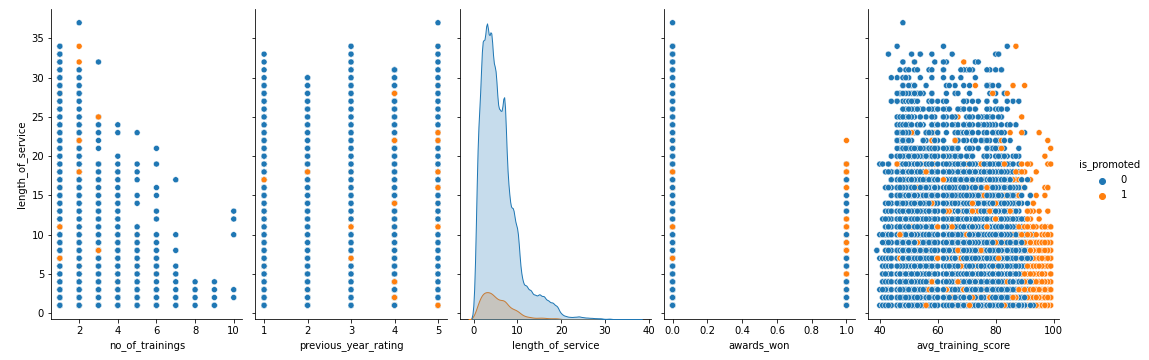

<Figure size 1149.25x360 with 0 Axes>

<IPython.core.display.Javascript object>

In [18]:
sns.pairplot(data_encoded, hue="is_promoted", diag_kind='kde', height = 5, aspect =.6, x_vars = ["no_of_trainings", "previous_year_rating","length_of_service", "awards_won", "avg_training_score"], y_vars=["length_of_service"])
plt.savefig("./pairplot.png")
plt.clf() # clean pairplot figure from sns
##Double click on Image below
Image(filename='./pairplot.png') # show as image

- Majority promoted were those who completed between 0 to 3 trainings or whose score is between 80 to 100,

In [73]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

is_promoted          0     1    All
no_of_trainings                    
All              50140  4668  54808
1                40468  3910  44378
2                 7382   605   7987
3                 1654   122   1776
4                  442    26    468
5                  125     3    128
6                   42     2     44
7                   12     0     12
8                    5     0      5
9                    5     0      5
10                   5     0      5
------------------------------------------------------------------------------------------------------------------------


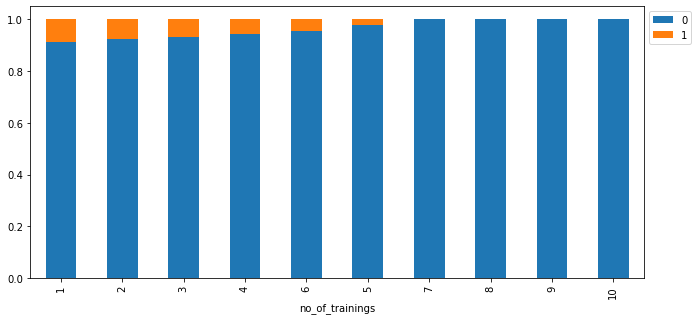

<IPython.core.display.Javascript object>

In [20]:
stacked_barplot(data_encoded, "no_of_trainings", "is_promoted")

- We can see a clear trend here that employees above 5 trainings have not been promoted.

is_promoted      0     1    All
age                            
All          50140  4668  54808
30            3341   324   3665
33            2891   319   3210
31            3224   310   3534
28            2839   308   3147
32            3237   297   3534
29            3111   294   3405
34            2790   286   3076
35            2428   283   2711
27            2566   261   2827
36            2309   208   2517
38            1739   184   1923
37            1981   184   2165
26            1897   163   2060
39            1534   161   1695
40            1536   127   1663
41            1185   104   1289
42            1058    91   1149
43             915    77    992
24             775    70    845
44             777    70    847
25            1230    69   1299
45             712    48    760
48             513    44    557
46             654    43    697
23             394    34    428
51             355    34    389
49             408    33    441
50             490    31    521
52      

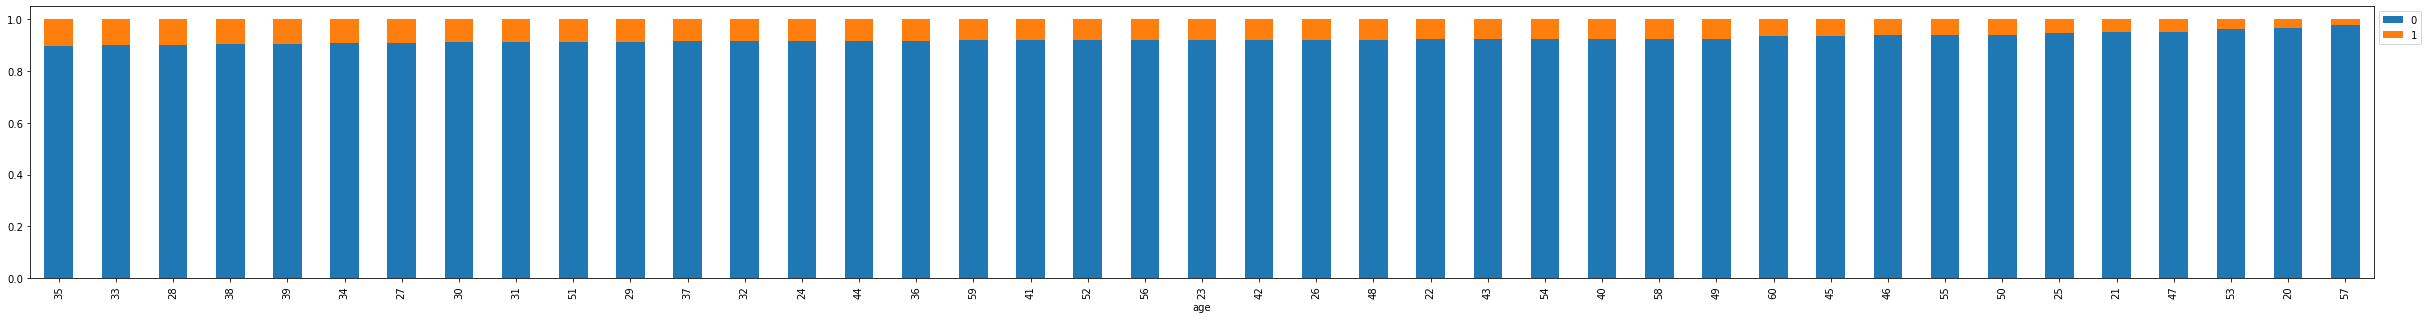

<IPython.core.display.Javascript object>

In [21]:
stacked_barplot(data_encoded, "age", "is_promoted")

- Ratio of promotion 20 or below and 57 and above is very very low.

is_promoted      0     1    All
awards_won                     
All          50140  4668  54808
0            49429  4109  53538
1              711   559   1270
------------------------------------------------------------------------------------------------------------------------


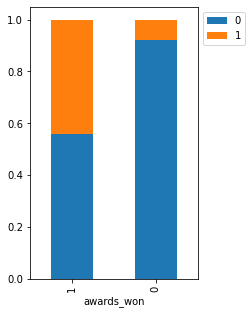

<IPython.core.display.Javascript object>

In [22]:
stacked_barplot(data_encoded, "awards_won", "is_promoted")

- We can see that the number of awards is zero, chances of employee being promoted is low..

is_promoted             0     1    All
avg_training_score                    
All                 47757  4491  52248
82.0                 1296   151   1447
81.0                 1208   149   1357
59.0                 1919   145   2064
60.0                 2017   138   2155
58.0                 1768   130   1898
83.0                 1071   127   1198
70.0                  932   123   1055
86.0                  792   120    912
84.0                 1048   120   1168
80.0                 1086   120   1206
62.0                 1333   117   1450
50.0                 2604   112   2716
71.0                  790   108    898
85.0                  967   105   1072
51.0                 2244   103   2347
49.0                 2581   100   2681
48.0                 2341    96   2437
69.0                  922    96   1018
63.0                  927    94   1021
78.0                  845    88    933
72.0                  639    86    725
87.0                  571    84    655
89.0                  217

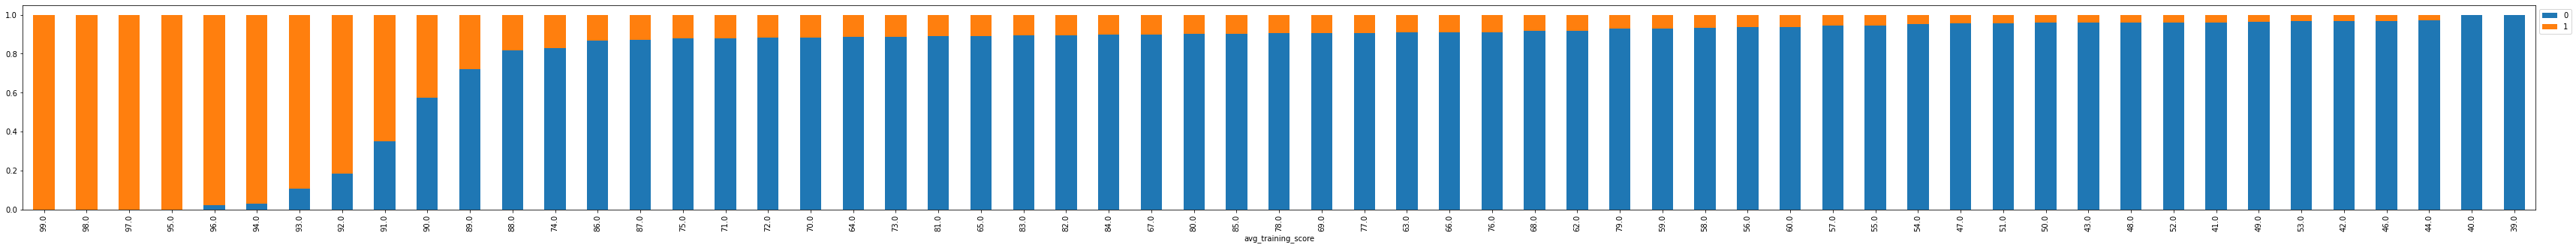

<IPython.core.display.Javascript object>

In [23]:
stacked_barplot(data_encoded, "avg_training_score", "is_promoted")

- Number of promotions decrease below an average training score of 89 and below.
- Average training score 45 and below have not been promoted.

is_promoted      0     1    All
gender_m                       
All          50140  4668  54808
1            35295  3201  38496
0            14845  1467  16312
------------------------------------------------------------------------------------------------------------------------


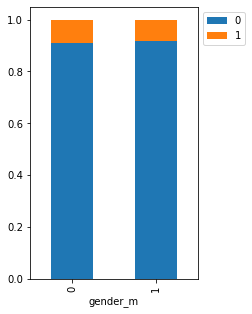

<IPython.core.display.Javascript object>

In [24]:
stacked_barplot(data_encoded, "gender_m", "is_promoted")

is_promoted                       0     1    All
recruitment_channel_referred                    
All                           50140  4668  54808
0                             49136  4530  53666
1                              1004   138   1142
------------------------------------------------------------------------------------------------------------------------


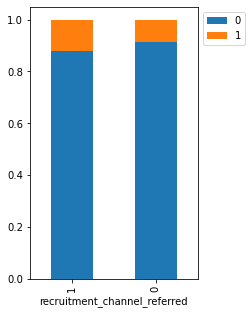

<IPython.core.display.Javascript object>

In [25]:
stacked_barplot(data_encoded, "recruitment_channel_referred", "is_promoted")

is_promoted                       0     1    All
recruitment_channel_sourcing                    
All                           50140  4668  54808
0                             28894  2694  31588
1                             21246  1974  23220
------------------------------------------------------------------------------------------------------------------------


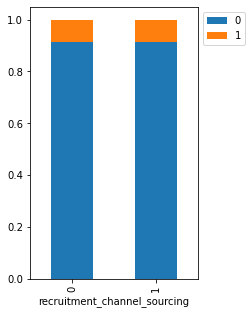

<IPython.core.display.Javascript object>

In [26]:
stacked_barplot(data_encoded, "recruitment_channel_sourcing", "is_promoted")

is_promoted                      0     1    All
education_Masters_and_Above                    
All                          50140  4668  54808
0                            36686  3197  39883
1                            13454  1471  14925
------------------------------------------------------------------------------------------------------------------------


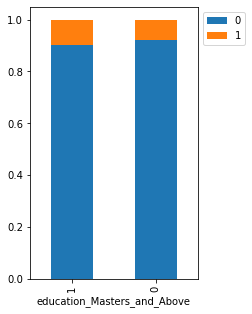

<IPython.core.display.Javascript object>

In [27]:
stacked_barplot(data_encoded, "education_Masters_and_Above", "is_promoted")

is_promoted                    0     1    All
education_below_Secondary                    
All                        50140  4668  54808
0                          49402  4601  54003
1                            738    67    805
------------------------------------------------------------------------------------------------------------------------


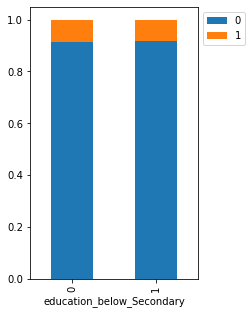

<IPython.core.display.Javascript object>

In [28]:
stacked_barplot(data_encoded, "education_below_Secondary", "is_promoted")

<AxesSubplot:xlabel='education_Masters_and_Above,education_below_Secondary'>

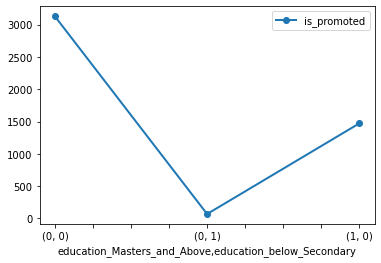

<IPython.core.display.Javascript object>

In [29]:
pd.pivot_table(
    data=data_encoded,
    index=["education_Masters_and_Above", "education_below_Secondary"],
    values="is_promoted",
    aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2)

<AxesSubplot:xlabel='recruitment_channel_referred,recruitment_channel_sourcing'>

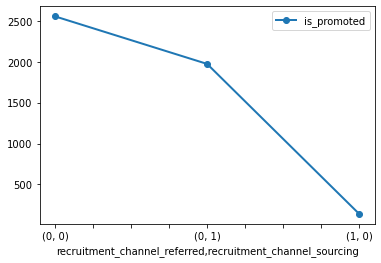

<IPython.core.display.Javascript object>

In [30]:
pd.pivot_table(
    data=data_encoded,
    index=["recruitment_channel_referred", "recruitment_channel_sourcing"],
    values="is_promoted",
    aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2)

<AxesSubplot:xlabel='department_Finance,department_HR'>

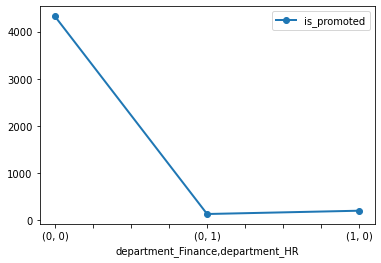

<IPython.core.display.Javascript object>

In [31]:
pd.pivot_table(
    data=data_encoded,
    index=["department_Finance", "department_HR"],
    values="is_promoted",
    aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2)

<AxesSubplot:xlabel='department_Operations,department_Legal'>

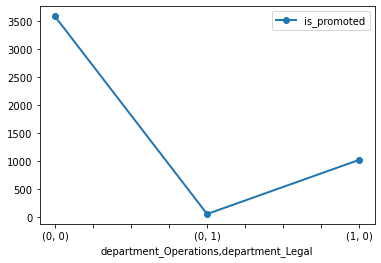

<IPython.core.display.Javascript object>

In [32]:
pd.pivot_table(
    data=data_encoded,
    index=["department_Operations", "department_Legal"],
    values="is_promoted",
    aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2)

<AxesSubplot:xlabel='department_Procurement,department_Operations'>

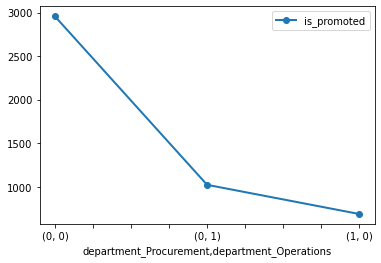

<IPython.core.display.Javascript object>

In [33]:
pd.pivot_table(
    data=data_encoded,
    index=["department_Procurement", "department_Operations"],
    values="is_promoted",
    aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2)

<AxesSubplot:xlabel='department_Sales_and_Marketing,department_RD'>

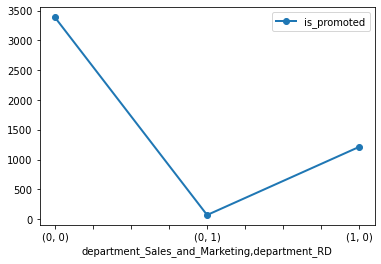

<IPython.core.display.Javascript object>

In [34]:
pd.pivot_table(
    data=data_encoded,
    index=["department_Sales_and_Marketing", "department_RD"],
    values="is_promoted",
    aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2)

<AxesSubplot:xlabel='department_Technology,department_Sales_and_Marketing'>

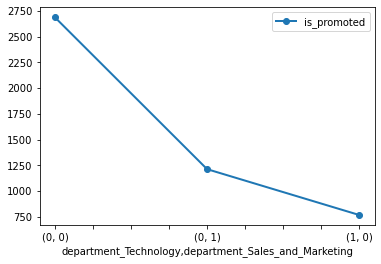

<IPython.core.display.Javascript object>

In [35]:
pd.pivot_table(
    data=data_encoded,
    index=["department_Technology", "department_Sales_and_Marketing"],
    values="is_promoted",
    aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2)

<AxesSubplot:xlabel='previous_year_rating,no_of_trainings'>

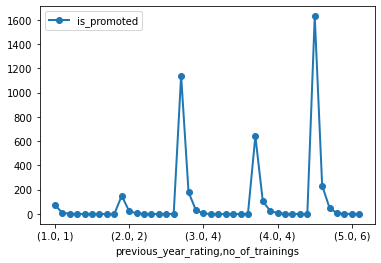

<IPython.core.display.Javascript object>

In [36]:
pd.pivot_table(
    data=data_encoded,
    index=["previous_year_rating", "no_of_trainings"],
    values="is_promoted",
    aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2)

- Most employees who are promoted who have previous rating bertween 4.0 and 5.0 and number of trainings around 5. Ironically Employees promoted between 3 and 4 previous ratings and 4 trainings is lower than those between 2.0 and 3.0 ratings and 3 trainings

<AxesSubplot:xlabel='awards_won,avg_training_score'>

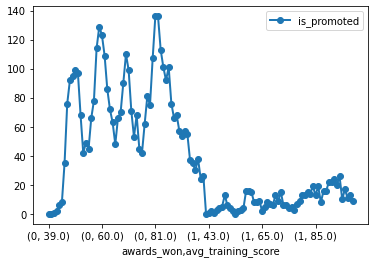

<IPython.core.display.Javascript object>

In [37]:
pd.pivot_table(
    data=data_encoded,
    index=["awards_won", "avg_training_score"],
    values="is_promoted",
    aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2)

- We can see that promotion has with higher training score and Awards Won as compared to lowe4r score and no awards.

pd.pivot_table(
    data=data_encoded,
    index=["avg_training_score", "no_of_trainings"],
    values="is_promoted",
    aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2)

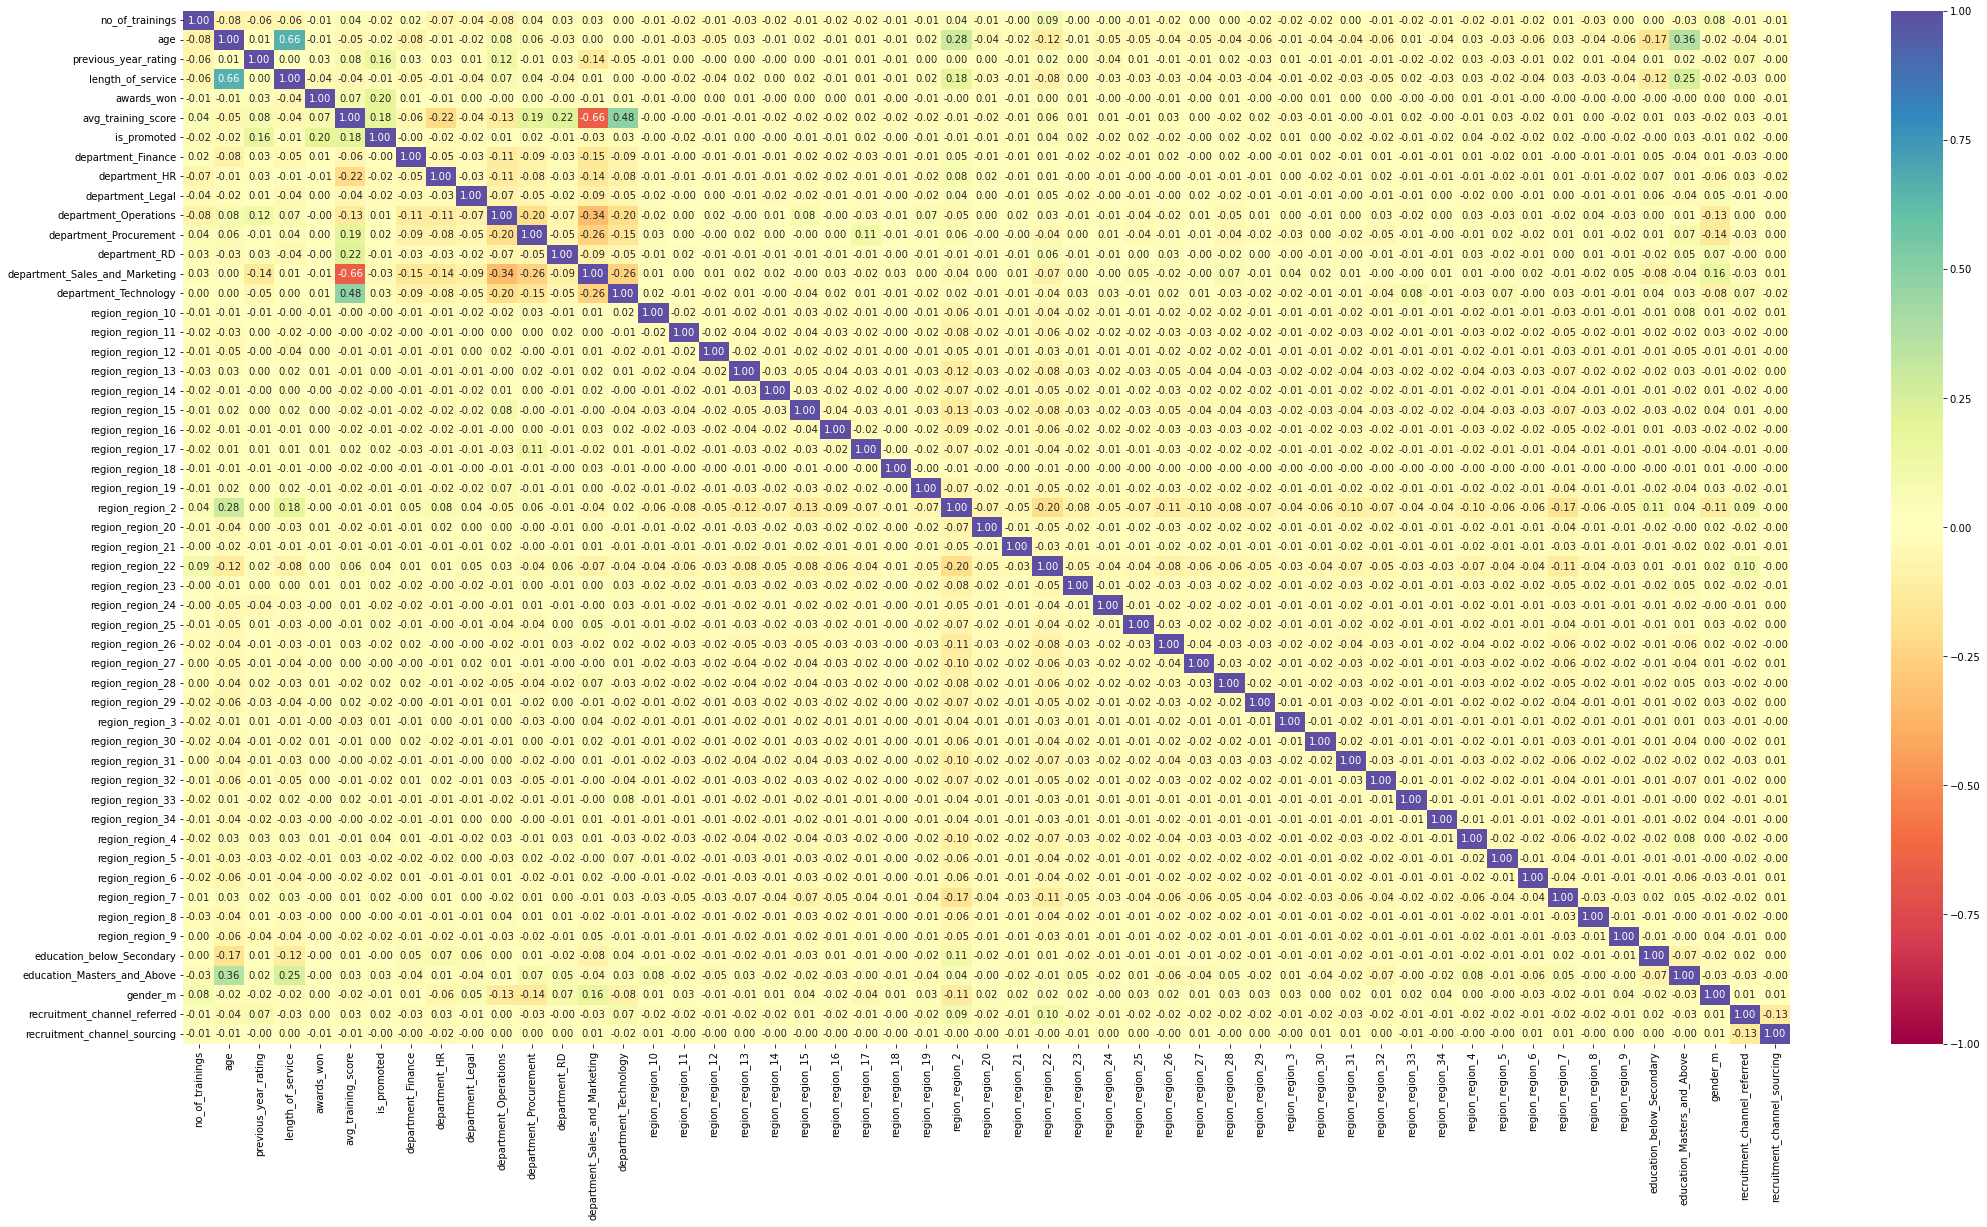

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(36, 19))
sns.heatmap(data_encoded.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- As expected, age and length_of_service have a high positive correlation. We can drop one of them.
- department_Sales_and_Marketing and avg_training_score columns are highly negatively correlated. We can drop one of them.
- A high percentage of Employees who had not win any award and whose avg_training_score was between 39 and 81 were promoted.

## Data Preprocessing

### Data Preparation for Modeling

In [17]:
data1 = data.copy()

<IPython.core.display.Javascript object>

In [18]:
# Separating target variable and other variables
X = data1.drop(columns="is_promoted")


Y = data1["is_promoted"]

<IPython.core.display.Javascript object>

In [19]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [20]:
# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1
)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape)

(32884, 11) (10962, 11) (10962, 11) (32884,)


<IPython.core.display.Javascript object>

### Data Encoding

In [21]:
# encoding
X_train=pd.get_dummies(X_train,drop_first=True)
X_val = pd.get_dummies(X_val,drop_first=True) 
X_test= pd.get_dummies(X_test,drop_first=True)
print(X_train.shape,X_val.shape, X_test.shape)

(32884, 52) (10962, 52) (10962, 52)


<IPython.core.display.Javascript object>

In [22]:
# fixing column names 
X_train.columns = [c.replace("&", "") for c in X_train.columns]
X_train.columns = [c.replace("education_Below Secondary", "education_below_Secondary") for c in X_train.columns]
X_train.columns = [c.replace("department_Sales  Marketing", "department_Sales_and_Marketing") for c in X_train.columns]
X_train.columns = [c.replace("education_Master's  above", "education_Masters_and_Above") for c in X_train.columns]
X_train.columns = [c.replace("department_RD ", "department_R_and_D") for c in X_train.columns]


X_val.columns = [c.replace("&", "") for c in X_val.columns]
X_val.columns = [c.replace("education_Below Secondary", "education_below_Secondary") for c in X_val.columns]
X_val.columns = [c.replace("department_Sales  Marketing", "department_Sales_and_Marketing") for c in X_val.columns]
X_val.columns = [c.replace("education_Master's  above", "education_Masters_and_Above") for c in X_val.columns]
X_val.columns = [c.replace("department_RD ", "department_R_and_D") for c in X_val.columns]

X_test.columns = [c.replace("&", "") for c in X_val.columns]
X_test.columns = [c.replace("education_Below Secondary", "education_below_Secondary") for c in X_test.columns]
X_test.columns = [c.replace("department_Sales  Marketing", "department_Sales_and_Marketing") for c in X_test.columns]
X_test.columns = [c.replace("education_Master's  above", "education_Masters_and_Above") for c in X_test.columns]
X_test.columns = [c.replace("department_RD ", "department_R_and_D") for c in X_test.columns]


<IPython.core.display.Javascript object>

In [23]:
# We will drop age and department_Sales_and_Marketing
X_train = X_train.drop(columns="age")
X_train = X_train.drop(columns="department_Sales_and_Marketing")

X_val = X_val.drop(columns="age")
X_val = X_val.drop(columns="department_Sales_and_Marketing")

X_test = X_test.drop(columns="age")
X_test = X_test.drop(columns="department_Sales_and_Marketing")

<IPython.core.display.Javascript object>

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32884 entries, 3930 to 6811
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               32884 non-null  int64  
 1   previous_year_rating          30394 non-null  float64
 2   length_of_service             32884 non-null  int64  
 3   awards_won                    32884 non-null  int64  
 4   avg_training_score            31349 non-null  float64
 5   department_Finance            32884 non-null  uint8  
 6   department_HR                 32884 non-null  uint8  
 7   department_Legal              32884 non-null  uint8  
 8   department_Operations         32884 non-null  uint8  
 9   department_Procurement        32884 non-null  uint8  
 10  department_RD                 32884 non-null  uint8  
 11  department_Technology         32884 non-null  uint8  
 12  region_region_10              32884 non-null  uint8  
 13 

<IPython.core.display.Javascript object>

In [25]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 40012 to 52421
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               10962 non-null  int64  
 1   previous_year_rating          10149 non-null  float64
 2   length_of_service             10962 non-null  int64  
 3   awards_won                    10962 non-null  int64  
 4   avg_training_score            10434 non-null  float64
 5   department_Finance            10962 non-null  uint8  
 6   department_HR                 10962 non-null  uint8  
 7   department_Legal              10962 non-null  uint8  
 8   department_Operations         10962 non-null  uint8  
 9   department_Procurement        10962 non-null  uint8  
 10  department_RD                 10962 non-null  uint8  
 11  department_Technology         10962 non-null  uint8  
 12  region_region_10              10962 non-null  uint8  
 1

<IPython.core.display.Javascript object>

In [26]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 14959 to 20601
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               10962 non-null  int64  
 1   previous_year_rating          10141 non-null  float64
 2   length_of_service             10962 non-null  int64  
 3   awards_won                    10962 non-null  int64  
 4   avg_training_score            10465 non-null  float64
 5   department_Finance            10962 non-null  uint8  
 6   department_HR                 10962 non-null  uint8  
 7   department_Legal              10962 non-null  uint8  
 8   department_Operations         10962 non-null  uint8  
 9   department_Procurement        10962 non-null  uint8  
 10  department_RD                 10962 non-null  uint8  
 11  department_Technology         10962 non-null  uint8  
 12  region_region_10              10962 non-null  uint8  
 1

<IPython.core.display.Javascript object>

## Missing Values Imputation

In [27]:
# let's check for missing values in the data
print(X_train.isnull().sum() )

no_of_trainings                    0
previous_year_rating            2490
length_of_service                  0
awards_won                         0
avg_training_score              1535
department_Finance                 0
department_HR                      0
department_Legal                   0
department_Operations              0
department_Procurement             0
department_RD                      0
department_Technology              0
region_region_10                   0
region_region_11                   0
region_region_12                   0
region_region_13                   0
region_region_14                   0
region_region_15                   0
region_region_16                   0
region_region_17                   0
region_region_18                   0
region_region_19                   0
region_region_2                    0
region_region_20                   0
region_region_21                   0
region_region_22                   0
region_region_23                   0
r

<IPython.core.display.Javascript object>

- Two columns have missing values in common

In [28]:
# let's check for missing values in the data
print(X_val.isnull().sum() )

no_of_trainings                   0
previous_year_rating            813
length_of_service                 0
awards_won                        0
avg_training_score              528
department_Finance                0
department_HR                     0
department_Legal                  0
department_Operations             0
department_Procurement            0
department_RD                     0
department_Technology             0
region_region_10                  0
region_region_11                  0
region_region_12                  0
region_region_13                  0
region_region_14                  0
region_region_15                  0
region_region_16                  0
region_region_17                  0
region_region_18                  0
region_region_19                  0
region_region_2                   0
region_region_20                  0
region_region_21                  0
region_region_22                  0
region_region_23                  0
region_region_24            

<IPython.core.display.Javascript object>

- Two columns have missing values in common

In [29]:
# let's check for missing values in the data
print(X_test.isnull().sum() )

no_of_trainings                   0
previous_year_rating            821
length_of_service                 0
awards_won                        0
avg_training_score              497
department_Finance                0
department_HR                     0
department_Legal                  0
department_Operations             0
department_Procurement            0
department_RD                     0
department_Technology             0
region_region_10                  0
region_region_11                  0
region_region_12                  0
region_region_13                  0
region_region_14                  0
region_region_15                  0
region_region_16                  0
region_region_17                  0
region_region_18                  0
region_region_19                  0
region_region_2                   0
region_region_20                  0
region_region_21                  0
region_region_22                  0
region_region_23                  0
region_region_24            

<IPython.core.display.Javascript object>

- Imputer object using the mean strategy and
- missing_values type for imputation

In [30]:
# Impute missing values
missing_cols = [ 'previous_year_rating', 'avg_training_score' ]
 
# Using median to impute the missing values
for col in missing_cols:
     X_train.loc[X_train.loc[:,col].isnull(),col]=X_train.loc[:,col].median()
     X_val.loc[X_val.loc[:,col].isnull(),col]=X_val.loc[:,col].median()
     X_test.loc[X_test.loc[:,col].isnull(),col]=X_test.loc[:,col].median()
        


<IPython.core.display.Javascript object>

In [31]:
print("count of NULL values after imputation\n")
X_train.isnull().sum()

count of NULL values after imputation



no_of_trainings                 0
previous_year_rating            0
length_of_service               0
awards_won                      0
avg_training_score              0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_RD                   0
department_Technology           0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_20                0
region_region_21                0
region_region_22                0
region_region_23                0
region_region_24                0
region_region_25                0
region_region_

<IPython.core.display.Javascript object>

In [32]:
print("count of NULL values after imputation\n")
X_val.isnull().sum()

count of NULL values after imputation



no_of_trainings                 0
previous_year_rating            0
length_of_service               0
awards_won                      0
avg_training_score              0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_RD                   0
department_Technology           0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_20                0
region_region_21                0
region_region_22                0
region_region_23                0
region_region_24                0
region_region_25                0
region_region_

<IPython.core.display.Javascript object>

In [33]:
print("count of NULL values after imputation\n")
X_test.isnull().sum()

count of NULL values after imputation



no_of_trainings                 0
previous_year_rating            0
length_of_service               0
awards_won                      0
avg_training_score              0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_RD                   0
department_Technology           0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_20                0
region_region_21                0
region_region_22                0
region_region_23                0
region_region_24                0
region_region_25                0
region_region_

<IPython.core.display.Javascript object>

- Now there are no missing values

## Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting an employee will not get promoted and the employee gets a promotion - Loss of resources
2. Predicting an employee will get promoted and the employee does not get promoted -Loss of opportunity

#### Which case is more important? 
* Predicting that an employee will get promoted and the employee gets a promotion i.e. losing on a filling in the position and also there will be a budget allocation issue if it comes a surprise.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

**Let's start by building different models using KFold and cross_val_score and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [34]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("logi", LogisticRegression(random_state=1)))
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, cv=5
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 92.35798774539454
Random forest: 92.48874275057923
GBM: 93.04220830387692
Adaboost: 92.51611778789686
Xgboost: 93.92714075483133
dtree: 88.50504569303851
logi: 92.08429841218401

Training Performance:

Bagging: 82.22543352601156
Random forest: 93.67774566473989
GBM: 20.23121387283237
Adaboost: 15.13728323699422
Xgboost: 35.00722543352601
dtree: 93.20809248554913
logi: 9.718208092485549


<IPython.core.display.Javascript object>

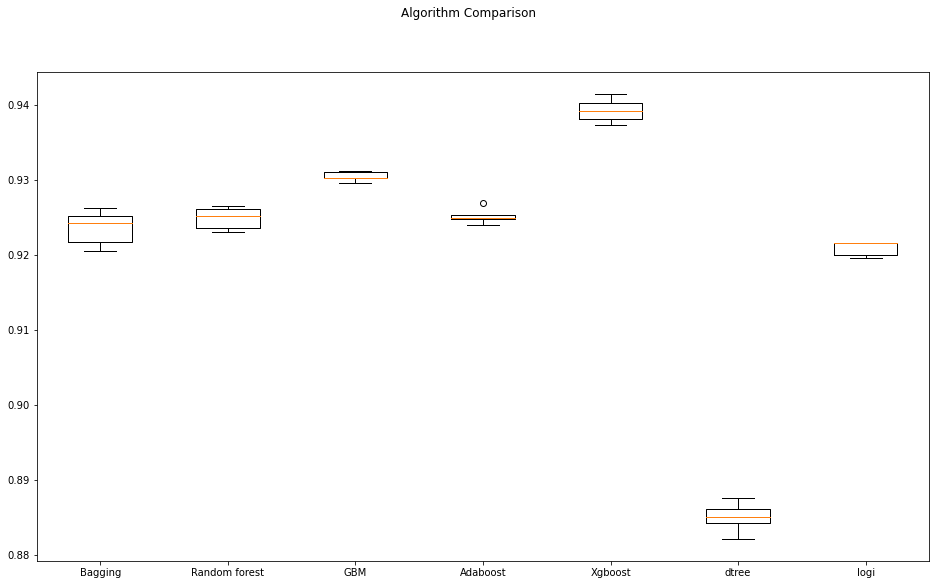

<IPython.core.display.Javascript object>

In [38]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(16, 9))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XG Boost is giving the highest cross-validated recall followed by Gradient Boost
- The Performance of Gradient Boost and XGBoost is generalised on validation set as well.
- We will tune - Gradient and XGBoost and see if the performance improves. 

## Hyperparameter Tuning

**We will tune Adaboost and xgboost models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

In [33]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [34]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Gradient Boost

### GridSearchCV

In [41]:
%%time 

# Parameter grid to pass in GridSearchCV

param_grid = {"n_estimators": np.arange(10, 110, 10), "learning_rate": [0.1, 0.01, 0.2, 0.05, 1] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


GBModel = GradientBoostingClassifier(random_state=1) 

# Calling GridSearchCV
GBgrid_cv = GridSearchCV(estimator=GBModel, scoring=scorer,param_grid=param_grid, n_jobs = 5, verbose=2)

# Fitting parameters in GridSearchCV
GBgrid_cv.fit(X_train, y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Wall time: 4min 5s


GridSearchCV(estimator=GradientBoostingClassifier(random_state=1), n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.01, 0.2, 0.05, 1],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring=make_scorer(recall_score), verbose=2)

<IPython.core.display.Javascript object>

In [42]:
print(
    "Best Parameters:{} \nScore: {}".format(GBgrid_cv.best_params_, GBgrid_cv.best_score_)
)

Best Parameters:{'learning_rate': 0.2, 'n_estimators': 90} 
Score: 0.2749433676500349


<IPython.core.display.Javascript object>

In [43]:
# building model with best parameters
GBM_tuned = GBgrid_cv.best_estimator_
    

# Fit the model on training data
GBM_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

In [44]:
# Calculating different metrics on train set
GBoost_grid_train = model_performance_classification_sklearn(
    GBM_tuned, X_train, y_train
)
print("Training performance:")
GBoost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.938,0.280,0.938,0.432


<IPython.core.display.Javascript object>

In [70]:
# Calculating different metrics on validation set
GBoost_grid_Val = model_performance_classification_sklearn(GBM_tuned, X_val, y_val)
print("Validation performance:")
GBoost_grid_Val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.933,0.266,0.911,0.412


<IPython.core.display.Javascript object>

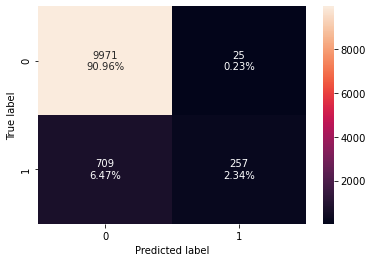

<IPython.core.display.Javascript object>

In [46]:
# creating confusion matrix
confusion_matrix_sklearn(GBM_tuned, X_val, y_val)

- The validation recall is similar to cross-validated recall
- The tuned Adaboost model is  overfitting the training data
- The validation recall is still less than 50% i.e. the model is not good at identifying potential employees who would be elligible for promotion.

## Gradient Boost
### RandomizedSearchCV

In [47]:
%%time 

# defining model
GBmodel_rand = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid =  {"n_estimators": np.arange(10, 110, 10), "learning_rate": [0.1, 0.01, 0.2, 0.05, 1]  }
               
 
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_GB_cv = RandomizedSearchCV(estimator=GBmodel_rand, param_distributions=param_grid, n_jobs = 5, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_GB_cv.fit(X_train,y_train)



Wall time: 3min 54s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=50, n_jobs=4,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.2, 0.05,
                                                          1],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=1, scoring=make_scorer(recall_score))

<IPython.core.display.Javascript object>

In [48]:
print("Best parameters are {} with CV score={}:" .format(randomized_GB_cv.best_params_,randomized_GB_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.2} with CV score=0.2749433676500349:


<IPython.core.display.Javascript object>

In [76]:
# building model with best parameters
GBmodel_random_tuned = randomized_GB_cv.best_estimator_
    

# Fit the model on training data
GBmodel_random_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

In [77]:
# Calculating different metrics on train set
GBoost_random_train = model_performance_classification_sklearn(
    GBmodel_random_tuned, X_train, y_train
)
print("Training performance:")
GBoost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.938,0.280,0.938,0.432


<IPython.core.display.Javascript object>

In [78]:
# Calculating different metrics on validation set
GBoost_random_Val = model_performance_classification_sklearn(GBmodel_random_tuned, X_val, y_val)
print("Validation performance:")
GBoost_random_Val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.933,0.266,0.911,0.412


<IPython.core.display.Javascript object>

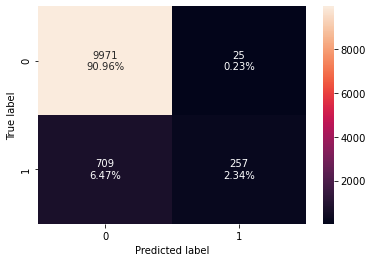

<IPython.core.display.Javascript object>

In [80]:
# creating confusion matrix
confusion_matrix_sklearn(GBmodel_random_tuned, X_val, y_val)

- Grid search took a significantly longer time than random search. This difference would further increase as the number of parameters increases. 
- The results from both grid and random search are similar

## XG Boost

### GridSearchCV  

In [53]:
%%time 

#defining model
XGBmodel = XGBClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.5],
            'gamma':[0,1,3],
            'subsample':[0.8,0.9],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10, 15]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
XGB_grid_cv = GridSearchCV(estimator=XGBmodel, param_grid=param_grid, scoring=scorer, n_jobs = 5, cv=5, verbose=2)

#Fitting parameters in GridSearchCV
XGB_grid_cv.fit(X_train,y_train)




Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[04:10:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1h 42min 41s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

<IPython.core.display.Javascript object>

In [54]:
print("Best parameters are {} with CV score={}:" .format(XGB_grid_cv.best_params_ ,  XGB_grid_cv.best_score_))

Best parameters are {'gamma': 1, 'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 5, 'scale_pos_weight': 10, 'subsample': 0.8} with CV score=0.6282521983796945:


<IPython.core.display.Javascript object>

In [55]:
# building model with best parameters
XGB_tuned = XGB_grid_cv.best_estimator_

# Fit the model on training data
XGB_tuned.fit(X_train, y_train)

[04:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=10, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [56]:
# Calculating different metrics on train set
XGBoost_grid_train = model_performance_classification_sklearn(
    XGB_tuned, X_train, y_train
)
print("Training performance:")
XGBoost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.785,0.634,0.224,0.331


<IPython.core.display.Javascript object>

In [94]:
# Calculating different metrics on validation set
XGBoost_grid_Val = model_performance_classification_sklearn(XGB_tuned, X_val, y_val)
print("Validation performance:")
XGBoost_grid_Val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.784,0.610,0.228,0.332


<IPython.core.display.Javascript object>

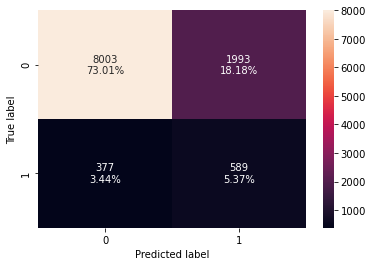

<IPython.core.display.Javascript object>

In [58]:
# creating confusion matrix
confusion_matrix_sklearn(XGB_tuned, X_val, y_val)

- The validation recall has increased by ~54% as compared to the result from cross-validation with default parameters.
- The model has very low precision score (however low precision shouldn't affect us much here)

## XG Boost
### RandomizedSearchCV

In [59]:
%%time

# defining model
XGBmodel_rand = XGBClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
XGB_randomized_cv = RandomizedSearchCV(estimator=XGBmodel_rand, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = 5, verbose=2)

#Fitting parameters in RandomizedSearchCV
XGB_randomized_cv.fit(X_train,y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[04:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 4min


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

<IPython.core.display.Javascript object>

In [60]:
print("Best parameters are {} with CV score={}:" .format(XGB_randomized_cv.best_params_,XGB_randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 5} with CV score=0.593207382116581:


<IPython.core.display.Javascript object>

In [61]:
# building model with best parameters
XGB_rand_tuned = XGB_randomized_cv.best_estimator_ # Fit the model on training data
XGB_rand_tuned.fit(X_train, y_train)

[04:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [82]:
# Calculating different metrics on train set
XGBoost_random_train = model_performance_classification_sklearn(
    XGB_rand_tuned, X_train, y_train
)
print("Training performance:")
XGBoost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.823,0.621,0.265,0.371


<IPython.core.display.Javascript object>

In [83]:
# Calculating different metrics on validation set
XGBoost_random_Val = model_performance_classification_sklearn(XGB_rand_tuned, X_val, y_val)
print("Validation performance:")
XGBoost_random_Val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.817,0.573,0.258,0.356


<IPython.core.display.Javascript object>

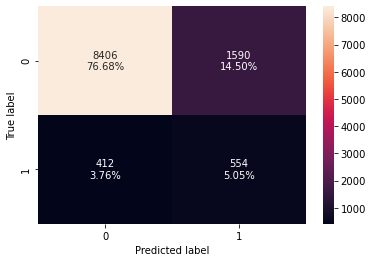

<IPython.core.display.Javascript object>

In [85]:
# creating confusion matrix
confusion_matrix_sklearn(XGB_rand_tuned, X_val, y_val)

- The parameters obtained from both grid search and random search are approximately same
- The performance of both the models is also very similar
- Tuning with grid search took a significantly longer time

## Comparing all models

In [87]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        GBoost_grid_train.T,
        GBoost_random_train.T,
        XGBoost_grid_train.T,
        XGBoost_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boost Tuned with Grid search",
    "Gradient Boost Tuned with Random search",
    "XGBoost Tuned with Grid search",
    "XGBoost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boost Tuned with Grid search,Gradient Boost Tuned with Random search,XGBoost Tuned with Grid search,XGBoost Tuned with Random Search
Accuracy,0.938,0.938,0.785,0.823
Recall,0.280,0.280,0.634,0.621
Precision,0.938,0.938,0.224,0.265
F1,0.432,0.432,0.331,0.371


<IPython.core.display.Javascript object>

In [88]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        GBoost_grid_Val.T,
        GBoost_grid_Val.T,
        XGBoost_grid_Val.T,
        XGBoost_grid_Val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,AdaBoost Tuned with Grid search,AdaBoost Tuned with Random search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.933,0.933,0.784,0.784
Recall,0.266,0.266,0.610,0.610
Precision,0.911,0.911,0.228,0.228
F1,0.412,0.412,0.332,0.332


<IPython.core.display.Javascript object>

- The xgboost model tuned using Grid search is giving the best validation recall  but it has the low values of train and validation precision.
- Let's check the model's performance on test set and then see the feature importance from the tuned xgboost model

#### Performance on the test set

In [91]:
# Calculating different metrics on the test set
xgboost_grid_test = model_performance_classification_sklearn(XGB_tuned, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.781,0.625,0.222,0.327


<IPython.core.display.Javascript object>

- The performance on test data is generalised

In [112]:
X

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000
1,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000
4,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000
...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000
54804,Operations,region_27,Master's & above,f,other,1,37,2.000,6,0,56.000
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.000,3,0,79.000
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000,2,0,nan


<IPython.core.display.Javascript object>

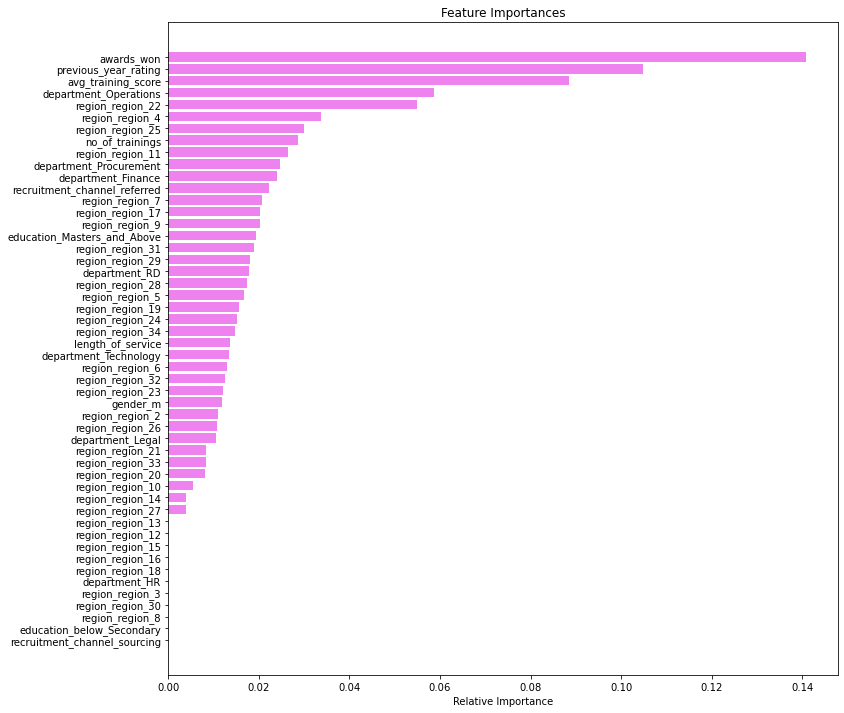

<IPython.core.display.Javascript object>

In [103]:
feature_names = X_train.columns
importances = XGB_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- awards_won, previous_year_rating, avg_training_score, number_of_trainings, recruitment_channel_referred,  
  education_Masters_and_Above are the top most important features. We can ignore region, and department safely as those are not important for 
  promotions.

## Over Sampling
### Using SMOTE

In [45]:
SMOTE_data = data1.copy()
# then we split the temporary set into train and validation

# Separating target variable and other variables
X1 = SMOTE_data.drop(columns="is_promoted")
Y1 = SMOTE_data["is_promoted"]

X_Strain, X_STest, y_Strain, y_STest = train_test_split(
    X1, Y1, test_size=0.20, random_state=1
)

print(X_Strain.shape, y_Strain.shape, X_STest.shape, y_STest.shape)

(43846, 11) (43846,) (10962, 11) (10962,)


<IPython.core.display.Javascript object>

In [46]:
# encoding
X_Strain=pd.get_dummies(X_Strain,drop_first=True)
X_STest= pd.get_dummies(X_STest,drop_first=True)

# Impute missing values
missing_cols = [ 'previous_year_rating', 'avg_training_score' ]
 
# Using median to impute the missing values
for col in missing_cols:
     X_Strain.loc[X_Strain.loc[:,col].isnull(),col]=X_Strain.loc[:,col].median()
     X_STest.loc[X_STest.loc[:,col].isnull(),col]=X_STest.loc[:,col].median()

<IPython.core.display.Javascript object>

In [49]:
sm = SMOTE()   #Synthetic Minority Over Sampling Technique
X_Strain_over, y_Strain_over = sm.fit_resample(X_Strain, y_Strain)

X_STest_over, y_Stest_over = sm.fit_resample(X_STest, y_STest)

<IPython.core.display.Javascript object>

In [50]:
Smodels = []  # Empty list to store all the models

# Appending models into the list
Smodels.append(("Bagging", BaggingClassifier(random_state=1)))
Smodels.append(("Random forest", RandomForestClassifier(random_state=1)))
Smodels.append(("GBM", GradientBoostingClassifier(random_state=1)))
Smodels.append(("Adaboost", AdaBoostClassifier(random_state=1)))
Smodels.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
Smodels.append(("dtree", DecisionTreeClassifier(random_state=1)))
Smodels.append(("logi", LogisticRegression(random_state=1)))
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in Smodels:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_Strain_over, y=y_Strain_over, cv=5
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in Smodels:
    model.fit(X_Strain_over, y_Strain_over)
    scores = recall_score(y_Strain_over, model.predict(X_Strain_over)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 94.23005758411725
Random forest: 94.96035927981524
GBM: 87.43683981701851
Adaboost: 86.82122265206375
Xgboost: 93.57579645945955
dtree: 91.84226240525729
logi: 84.09820129927373

Training Performance:

Bagging: 99.06283492435382
Random forest: 99.96510555569402
GBM: 86.12198100745245
Adaboost: 86.48089529174247
Xgboost: 92.2185389197677
dtree: 99.93768849231076
logi: 83.1335210986765


<IPython.core.display.Javascript object>

- We can see that after over sampling, the scores for XG Boost is almost the same. Random Forest is the highest for this data set.

## Undersampling
### Using Random Under Sampling

In [41]:
sm = RandomUnderSampler()   # RandomUnderSampler Undewr Sampling Technique
X_Strain_under, y_Strain_under = sm.fit_resample(X_Strain, y_Strain)

X_STest_under, y_Strain_under = sm.fit_resample(X_STest, y_STest)


<IPython.core.display.Javascript object>

In [42]:
Smodels = []  # Empty list to store all the models

# Appending models into the list
Smodels.append(("Bagging", BaggingClassifier(random_state=1)))
Smodels.append(("Random forest", RandomForestClassifier(random_state=1)))
Smodels.append(("GBM", GradientBoostingClassifier(random_state=1)))
Smodels.append(("Adaboost", AdaBoostClassifier(random_state=1)))
Smodels.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
Smodels.append(("dtree", DecisionTreeClassifier(random_state=1)))
Smodels.append(("logi", LogisticRegression(random_state=1)))
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in Smodels:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_STest_under, y=y_Strain_under, cv=5
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in Smodels:
    model.fit(X_STest_under, y_Strain_under)
    scores = recall_score(y_Strain_under, model.predict(X_STest_under)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 69.40409526616422
Random forest: 72.95762985418158
GBM: 72.05745722987102
Adaboost: 69.83102465861086
Xgboost: 70.62495614219753
dtree: 64.42072614486408
logi: 70.3083378945448

Training Performance:

Bagging: 96.60657476139978
Random forest: 100.0
GBM: 72.42841993637327
Adaboost: 72.8525980911983
Xgboost: 93.74337221633085
dtree: 100.0
logi: 70.20148462354189


<IPython.core.display.Javascript object>

- We can see that scores have degraded after under sampling.

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production

## Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

- Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [116]:
# Original Data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won            54808 non-null  int64  
 10  avg_training_score    52248 non-null  float64
 11  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 5.0+ MB


<IPython.core.display.Javascript object>

In [142]:
# Separating target variable and other variables
X = data1.drop(columns="is_promoted")
Y = data1["is_promoted"]


<IPython.core.display.Javascript object>

In [136]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(38365, 11) (16443, 11)


<IPython.core.display.Javascript object>

In [137]:
# creating a list of numerical variables
numerical_features = ['age', 'previous_year_rating', 
                      'length_of_service', 'awards_won', 
                      'avg_training_score'
                     ]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ["department", "region", "education", "gender", "recruitment_channel"]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

<IPython.core.display.Javascript object>

In [138]:
# Creating new pipeline with the best parameters from XG Boost Model Above

final_model =  Pipeline(
    steps=[  ("pre", preprocessor),
                ("XGB",
                 XGBClassifier ( base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.5, max_delta_step=0, max_depth=2,
                min_child_weight=1, monotone_constraints='()',
                 n_estimators=50, n_jobs=5, num_parallel_tree=1, random_state=1,
                 reg_alpha=0, reg_lambda=5, scale_pos_weight=10, subsample=0.8,
                 tree_method='exact', validate_parameters=1, verbosity=1 )
               )
        
           ]
)

# Fit the model on training data
final_model.fit(X_train, y_train)

[19:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'awards_won',
                                                   'avg_training_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
           

<IPython.core.display.Javascript object>

In [139]:
# Calculating different metrics on the test set
xgboost_final_train = model_performance_classification_sklearn(final_model, X_train, y_train)
print("Train performance of Final Model :")
xgboost_final_train

Train performance of Final Model :


,Accuracy,Recall,Precision,F1
0,0.823,0.636,0.270,0.379


<IPython.core.display.Javascript object>

In [140]:
# Calculating different metrics on the test set
xgboost_final_test = model_performance_classification_sklearn(final_model, X_test, y_test)
print("Test performance of Final Model:")
xgboost_grid_test

Test performance of Final Model:


,Accuracy,Recall,Precision,F1
0,0.781,0.625,0.222,0.327


<IPython.core.display.Javascript object>

## Business Recommendations

- Company should pay more attention to those who score high in training and complete higher number of tranings, and those are for long time. These employees are more likely to be recommended for promotion.
- We observed in our analysis that  length of service is highly skewed to the right side. This means that as the length of service increases number of employees decreses. The company should retain  
  more employees to be able to promote them in suitable positions. Hiring from within is more resourveful and cost effective.
- Male employees out number the female employees by more than 50%. Female employees can be increased.
- Its not very evident from data weather employees who completed more number of trainings or those who won awards or those who has Mastsres or higher degree are being promoted. The truth seems south 
  of this fact. 
- Recommendation engine learns with clear indpepence or clear dependence of the features and targets. Thereore more decsiplined and rational policies for promotion should be established. This will 
  help in better preditcitions by AI-ML programs.